In [1]:
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as plt 

%matplotlib inline

In [12]:
z_s = np.linspace(0., 4, 5)
s_z = [1.1,0.9,0.95,1.0,1.05]


# fz = np.ones_like(z) + interp1d(z_s, s_z, kind='linear', bounds_error=False, fill_value=0.0)(z)
fz_s = CubicSpline(z_s, s_z, bc_type='not-a-knot', extrapolate=None)

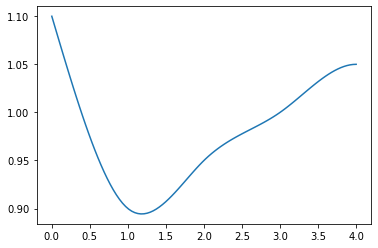

In [13]:
z = np.linspace(0,4, 100)
#plt.plot(z,fz_s(z))
fz_s = CubicSpline(z_s, s_z, bc_type=((2, 0.0), (1, 0.0)), extrapolate=None)
plt.plot(z,fz_s(z))

([<matplotlib.axis.XTick at 0x7fcf910a73a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

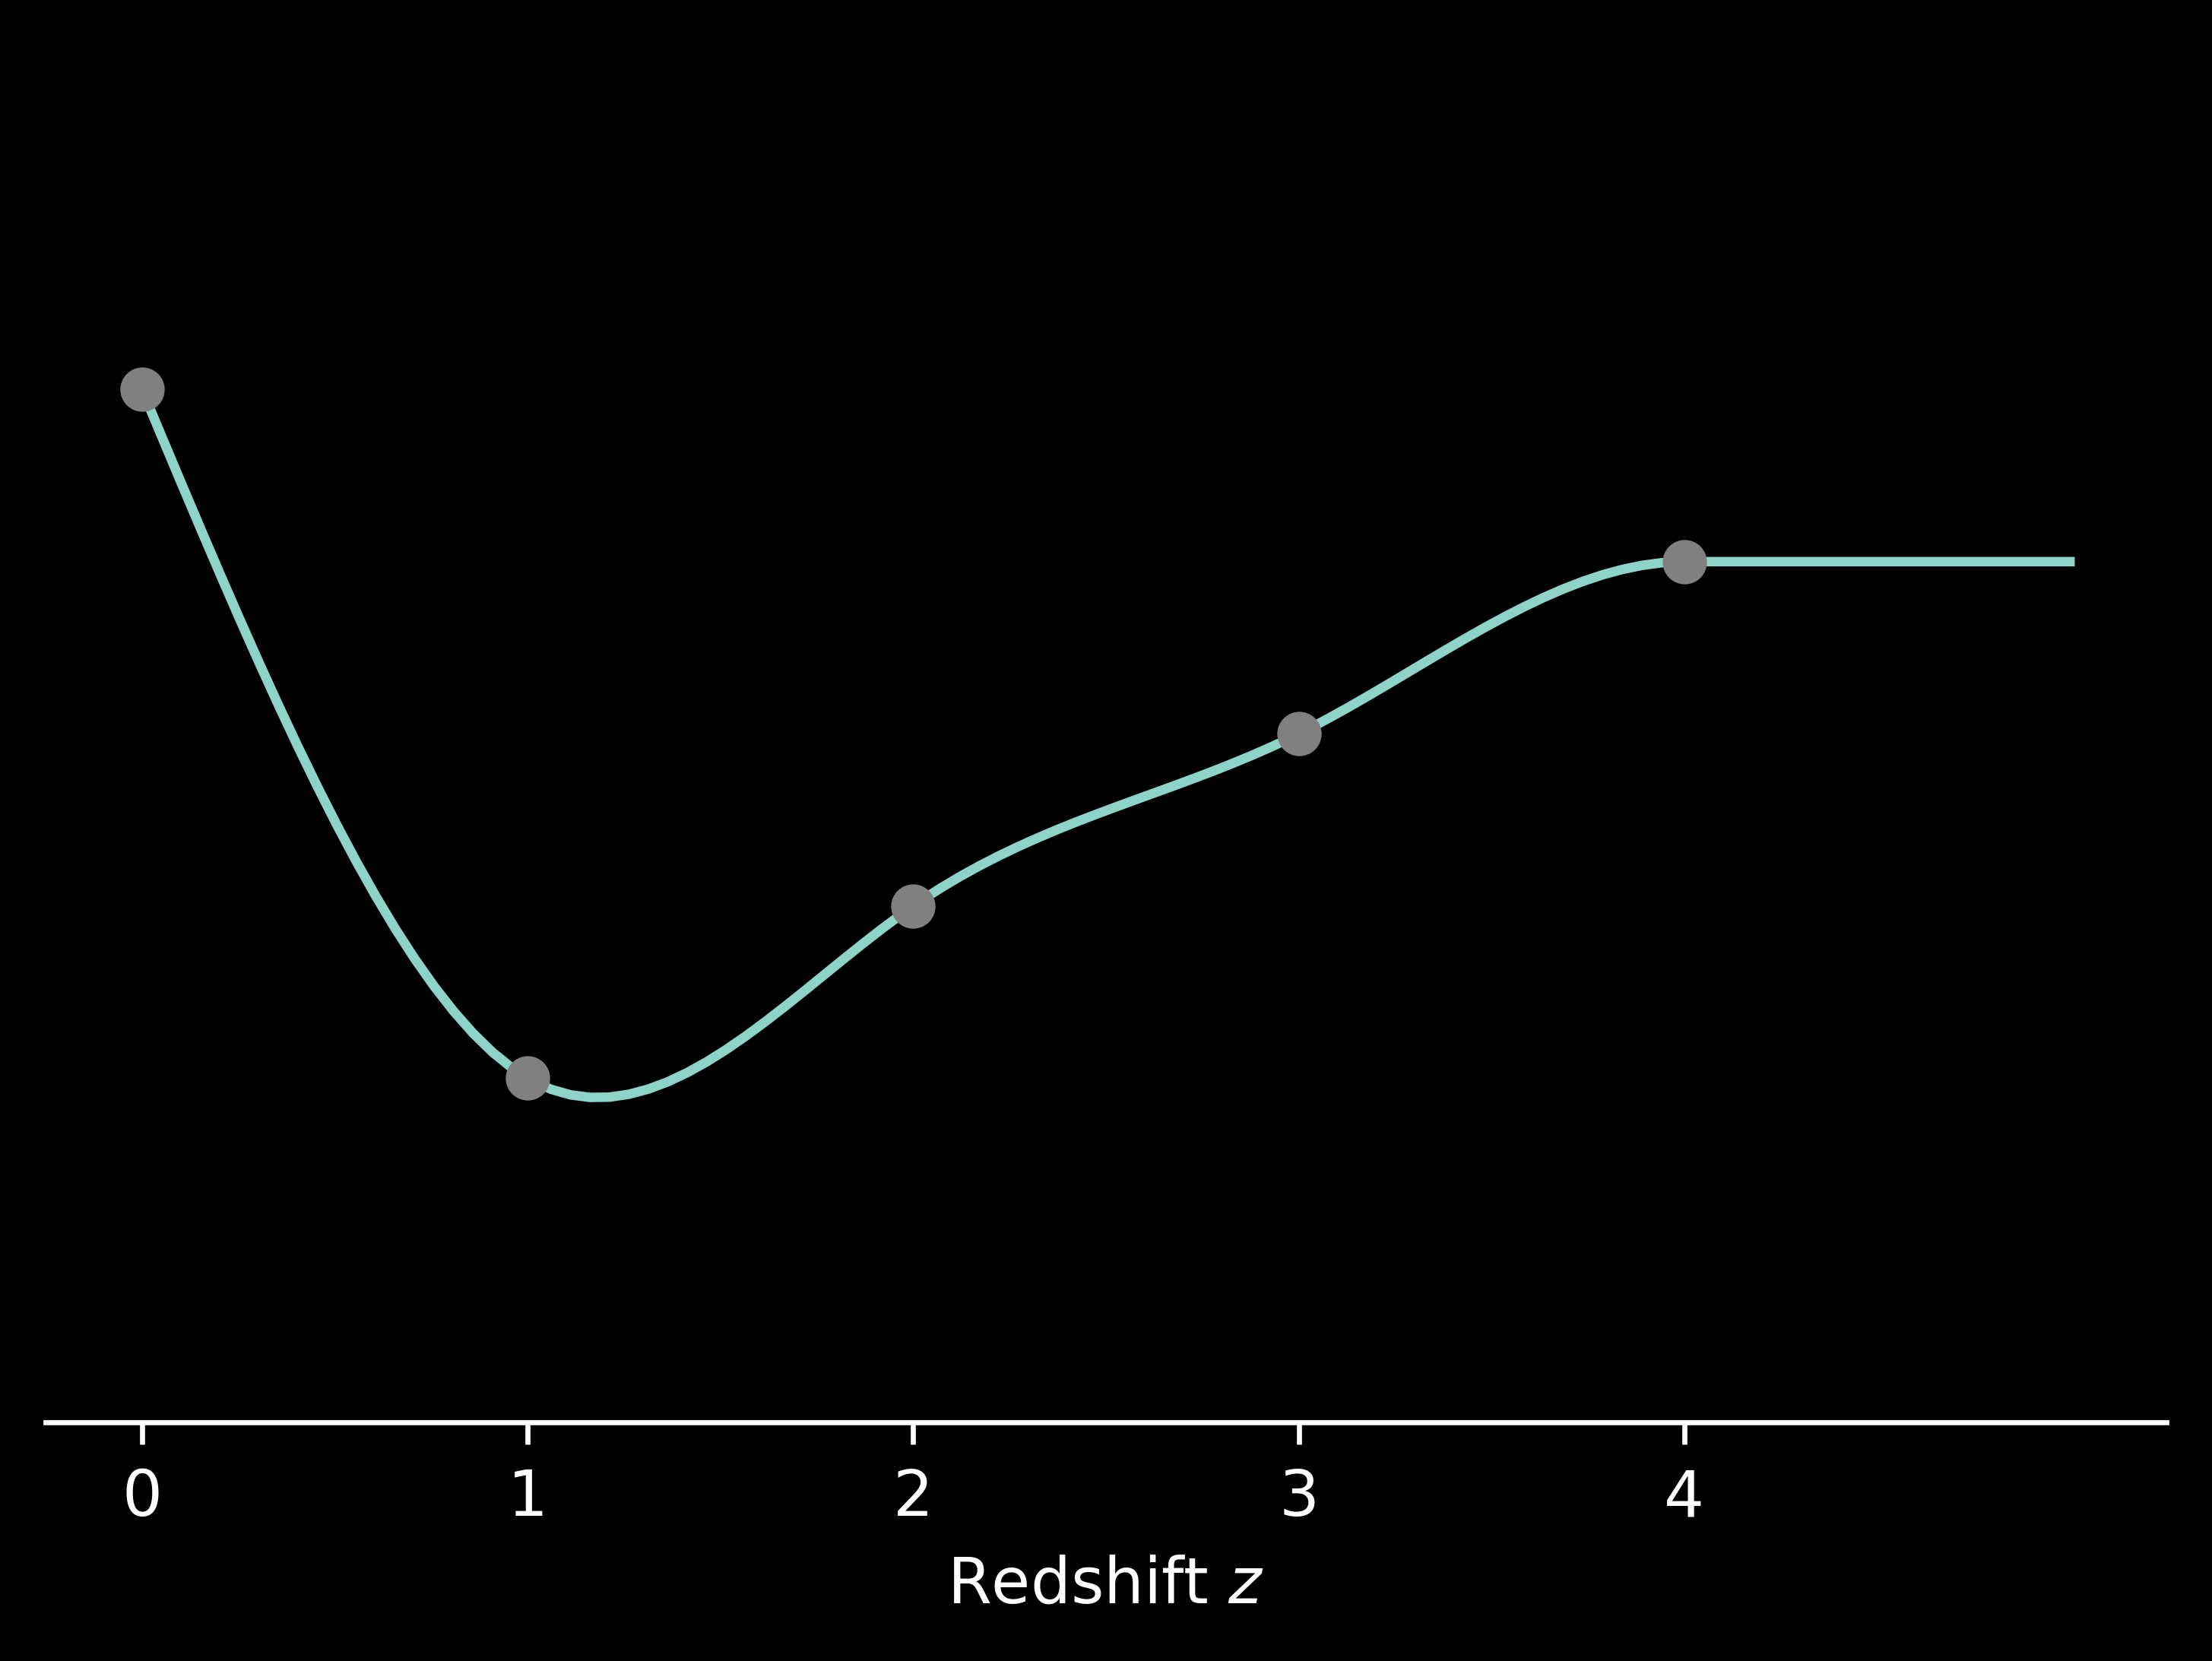

In [27]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

plt.style.use('dark_background')

zmax = 4.
class extraCublicSpline:
    def __init__(self, zmax, *args, **kwargs):
        self.cubicspline = CubicSpline(*args, **kwargs)
        self.zmax = zmax
        self.first_derivative = self.cubicspline.derivative(1)
        self.extrap = self.cubicspline(zmax)

    def __call__(self, z):
        return np.where(z<self.zmax, self.cubicspline(z), np.ones_like(z)*self.extrap)

    def derivative(self, z):
        return np.where(z<self.zmax, self.first_derivative(z), np.zeros_like(z))
fz_s = extraCublicSpline(zmax, z_s, s_z, bc_type=((2,0.),(1.,0.)), extrapolate=False)

z = np.linspace(0,5, 100)
plt.plot(z,fz_s(z))
plt.plot(z_s,fz_s(z_s), "o", color="grey")
plt.ylim(0.8, 1.2)
plt.xlabel("Redshift $z$")

ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks([])
plt.xticks([0., 1., 2., 3., 4.])
